In [1]:
import numpy as np
import matplotlib as mpl
import mne
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib qt



In [2]:
fname = 'Data/Resting and cognitive state EEG dataset/sub-01/ses-session1/eeg/sub-01_ses-session1_task-eyesclosed_eeg.vhdr'
raw = mne.io.read_raw_brainvision(fname, preload=True).filter(1 ,100)

Extracting parameters from Data/Resting and cognitive state EEG dataset/sub-01/ses-session1/eeg/sub-01_ses-session1_task-eyesclosed_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 4.096 (s)


Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\admin\AppData\Local\Temp\ipykernel_10348\1882662368.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_psd.plot(picks = 'P5')


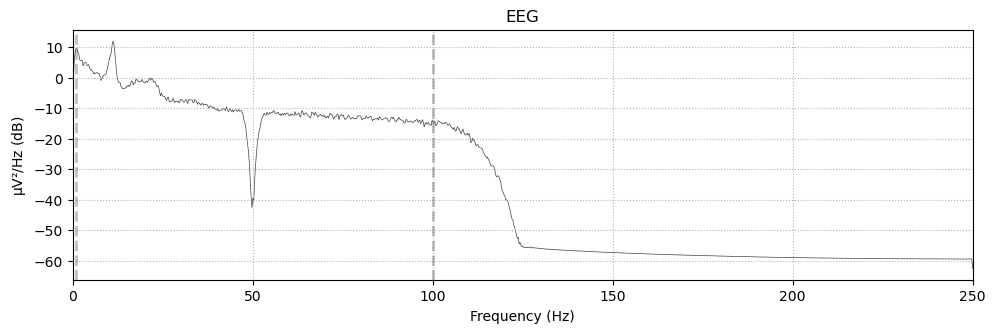

In [3]:
raw_psd = raw.compute_psd()
raw_psd.plot(picks = 'P5')

In [4]:
class Spectroscope:
    def __init__(self, array2d, freq_array, sample_size, sampling_freq):
        self.array2d = array2d
        self.freq_array = freq_array
        self.time_stamp = np.linspace(0, sample_size/sampling_freq, array2d.shape[1], endpoint=False)
        self.sample_size = sample_size
        self.sampling_freq = sampling_freq
        self.coef_density = sample_size/array2d.shape[1]/sampling_freq
        self.view_length = 10
        self.Plot, self.Axis = plt.subplots()
        self.Plot.subplots_adjust(bottom=0.25)
        self.sample_length = int(self.view_length / self.coef_density)
        self.view_start = 0
        self.sample_start = int(self.view_start / self.coef_density)
        self.X, self.Y = np.meshgrid(np.linspace(self.view_start, self.view_start+self.view_length, self.sample_length, False), self.freq_array)
        self.pc = self.Axis.pcolormesh(self.X, self.Y, self.array2d[ :, self.sample_start:self.sample_length:1])
        self.Plot.colorbar(self.pc)
        axis_position = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor = 'White')
        self.slider_position = Slider(axis_position,'Time', 0.0, self.time_stamp[-1] - self.view_length)
        self.slider_position.on_changed(self.update)
        
    def update(self, val):
        self.Axis.clear()
        pos = int(self.slider_position.val / self.coef_density )
        self.X, self.Y = np.meshgrid(np.linspace(self.slider_position.val, self.slider_position.val+self.view_length, self.sample_length, False), self.freq_array)
        self.Axis.pcolormesh(self.X, self.Y, self.array2d[ :, pos:pos+self.sample_length:1])

In [10]:
sampling_freq = 500
# window_size = int(sampling_freq * 0.4)
window_size = 248
p5 = raw.get_data(picks = ['P5']).squeeze()
stft = mne.time_frequency.stft(p5, window_size)
freq = mne.time_frequency.stftfreq(window_size, sampling_freq)
# sptg = np.log10(np.absolute(stft).squeeze())
sptg = np.absolute(stft).squeeze()

Number of frequencies: 125
Number of time steps: 1210


In [6]:
p5_spectro = Spectroscope(sptg, freq, 150000, sampling_freq)



In [7]:
p5_spectro.Plot.show()

In [8]:
p5_fft = np.absolute(np.fft.fft(p5))

In [9]:
ticks_X = np.linspace(0, 500, 150000, False)
plt.figure()
dim_X = int(len(p5_fft)/2)
plt.plot(ticks_X[0:dim_X], p5_fft[0:dim_X])
plt.show()